## Omitted From Book

Code to index the TheMovieDB corpus to Solr (takes a few minutes)

In [12]:
# Index TMDB Corpus
from time import perf_counter 
from ltr.client.solr_client import SolrClient
import json
client = SolrClient(host='http://localhost:8983/solr')

from ltr.index import rebuild
from ltr.helpers.movies import indexable_movies
movies=indexable_movies(movies='data/tmdb_ai_pow_search.json')
rebuild(client, index='tmdb', doc_src=movies)


Reconfig from disk...
Deleted index tmdb [Status: 200]
Created index tmdb [Status: 200]
Reindexing...
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
500 Docs Sent [Status: 200]
50

In [13]:
from ltr.client.solr_client import SolrClient

client = SolrClient(host='http://localhost:8983/solr')

## Listing 10.03

In [14]:
from ltr.judgments import Judgment

Judgment(grade=1, keywords='social network', doc_id=37799)

Judgment(grade=1,qid=1,keywords=social network,doc_id=37799,features=[],weight=1

## Listing 10.04

In [15]:

mini_judg_list=[
    # for 'social network' query
    Judgment(grade=1, keywords='social network', doc_id='37799'), #The Social Network
    Judgment(grade=0, keywords='social network', doc_id='267752'), # #chicagoGirl
    Judgment(grade=0, keywords='social network', doc_id='38408'), # Life As We Know It
    Judgment(grade=0, keywords='social network', doc_id='28303'), # The Cheyenne Social Club
    
    # for 'star wars' query
    Judgment(grade=1, keywords='star wars', doc_id='11'), # star wars
    Judgment(grade=1, keywords='star wars', doc_id='1892'), # return of jedi
    Judgment(grade=0, keywords='star wars', doc_id='54138'),# Star Trek Into Darkness
    Judgment(grade=0, keywords='star wars', doc_id='85783'), # The Star
    Judgment(grade=0, keywords='star wars', doc_id='325553'), # Battlestar Galactica
]

mini_judg_list

[Judgment(grade=1,qid=1,keywords=social network,doc_id=37799,features=[],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=267752,features=[],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=38408,features=[],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=28303,features=[],weight=1,
 Judgment(grade=1,qid=2,keywords=star wars,doc_id=11,features=[],weight=1,
 Judgment(grade=1,qid=2,keywords=star wars,doc_id=1892,features=[],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=54138,features=[],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=85783,features=[],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=325553,features=[],weight=1]

## Listing 10.05

In [16]:
mini_judg_list[0].features


[]

## Listing 10.06

In [17]:
import requests

feature_set = [
    {
      "name" : "title_bm25",
      "store": "movies",
      "class" : "org.apache.solr.ltr.feature.SolrFeature",
      "params" : { #q=title:({$keywords})
        "q" : "title:(${keywords})"
      }
    },
    {
      "name" : "overview_bm25",
      "store": "movies",
      "class" : "org.apache.solr.ltr.feature.SolrFeature",
      "params" : {
        "q" : "overview:(${keywords})"
      }
    },
    {
      "name" : "release_year",
      "store": "movies",
      "class" : "org.apache.solr.ltr.feature.SolrFeature",
      "params" : {
        "q" : "{!func}release_year"
}}]

resp = requests.put('http://localhost:8983/solr/tmdb/schema/feature-store',
                    json=feature_set)
resp.text

'{\n  "responseHeader":{\n    "status":0,\n    "QTime":33}}\n'

## Listing 10.07

In [18]:
import requests

logging_solr_query = {
    "fl": "id,title,[features store=movies efi.keywords=\"social network\"]",
    'q': "id:37799 OR id:267752 id:38408 OR id:28303", #social network graded documents
    'rows': 10,
    'wt': 'json'  
}

resp = requests.post('http://localhost:8983/solr/tmdb/select',
                     data=logging_solr_query)

resp.json()

{'responseHeader': {'status': 0,
  'QTime': 19,
  'params': {'q': 'id:37799 OR id:267752 id:38408 OR id:28303',
   'fl': 'id,title,[features store=movies efi.keywords="social network"]',
   'rows': '10',
   'wt': 'json'}},
 'response': {'numFound': 4,
  'start': 0,
  'docs': [{'id': '28303',
    'title': ['The Cheyenne Social Club'],
    '[features]': 'title_bm25=7.5430527,overview_bm25=6.839079,release_year=1970.0'},
   {'id': '38408',
    'title': ['Life As We Know It'],
    '[features]': 'title_bm25=0.0,overview_bm25=9.576859,release_year=2010.0'},
   {'id': '37799',
    'title': ['The Social Network'],
    '[features]': 'title_bm25=18.135925,overview_bm25=8.391596,release_year=2010.0'},
   {'id': '267752',
    'title': ['#chicagoGirl'],
    '[features]': 'title_bm25=0.0,overview_bm25=13.237938,release_year=2013.0'}]}}

# The following code is omitted from the book

This code just shows boring parsing of the Solr logging response for a single query (`CURR_QID`). The `FeatureLogger` class does all this for you (and helps account for bookkeeping). But we do want to show what this would look like if you recreated this in your own code

In [20]:
# Save off features for qid=1
CURR_QID=1

solr_json = resp.json()
doc_id_to_features = {}

# Map Doc Id => Features
for doc in solr_json['response']['docs']:
    # Parse '[features] array', ie
    # title_bm25=0.0,overview_bm25=13.237938,vote_average=7.0'
    features = doc['[features]']
    features = features.split(',')
    features = [float(ftr.split('=')[1]) for ftr in features]
    
    doc_id_to_features[doc['id']] = features

# Save in correct judgment
for judgment in mini_judg_list:
    if judgment.qid == CURR_QID:
        try:
            judgment.features = doc_id_to_features[judgment.doc_id]
        except KeyError:
            pass

mini_judg_list

[Judgment(grade=1,qid=1,keywords=social network,doc_id=37799,features=[18.135925, 8.391596, 2010.0],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=267752,features=[0.0, 13.237938, 2013.0],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=38408,features=[0.0, 9.576859, 2010.0],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=28303,features=[7.5430527, 6.839079, 1970.0],weight=1,
 Judgment(grade=1,qid=2,keywords=star wars,doc_id=11,features=[],weight=1,
 Judgment(grade=1,qid=2,keywords=star wars,doc_id=1892,features=[],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=54138,features=[],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=85783,features=[],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=325553,features=[],weight=1]

In [21]:
from ltr.log import FeatureLogger
from ltr.judgments import judgments_open
from itertools import groupby

ftr_logger=FeatureLogger(client, index='tmdb', feature_set='movies')
for qid, query_judgments in groupby(mini_judg_list, key=lambda j: j.qid):
    ftr_logger.log_for_qid(judgments=query_judgments, 
                           qid=qid)
        
ftr_logger.logged

Searching tmdb [Status: 200]
Discarded 0 Keep 4
Searching tmdb [Status: 200]
Discarded 0 Keep 5


[Judgment(grade=1,qid=1,keywords=social network,doc_id=37799,features=[18.135925, 8.391596, 2010.0],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=267752,features=[0.0, 13.237938, 2013.0],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=38408,features=[0.0, 9.576859, 2010.0],weight=1,
 Judgment(grade=0,qid=1,keywords=social network,doc_id=28303,features=[7.5430527, 6.839079, 1970.0],weight=1,
 Judgment(grade=1,qid=2,keywords=star wars,doc_id=11,features=[14.951998, 0.0, 1977.0],weight=1,
 Judgment(grade=1,qid=2,keywords=star wars,doc_id=1892,features=[0.0, 4.3300323, 1983.0],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=54138,features=[5.377082, 0.0, 2013.0],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=85783,features=[7.01165, 0.0, 1952.0],weight=1,
 Judgment(grade=0,qid=2,keywords=star wars,doc_id=325553,features=[0.0, 0.0, 2003.0],weight=1]

In [25]:
from ltr.log import FeatureLogger
from ltr.judgments import judgments_open
from itertools import groupby
from ltr import download

judgments='http://es-learn-to-rank.labs.o19s.com/ai_pow_search_judgments.txt'
download([judgments], dest='data/')

ftr_logger=FeatureLogger(client, index='tmdb', feature_set='movies')

with judgments_open('data/ai_pow_search_judgments.txt') as judgment_list:
    for qid, query_judgments in groupby(judgment_list, key=lambda j: j.qid):
        ftr_logger.log_for_qid(judgments=query_judgments, 
                               qid=qid,
                               keywords=judgment_list.keywords(qid))
    
ftr_logger.logged

data/ai_pow_search_judgments.txt already exists
Recognizing 105 queries...
Searching tmdb [Status: 200]
Discarded 0 Keep 41
Searching tmdb [Status: 200]
Discarded 0 Keep 41
Searching tmdb [Status: 200]
Discarded 0 Keep 39
Searching tmdb [Status: 200]
Discarded 0 Keep 28
Searching tmdb [Status: 200]
Discarded 0 Keep 33
Searching tmdb [Status: 200]
Discarded 0 Keep 39
Searching tmdb [Status: 200]
Discarded 0 Keep 35
Searching tmdb [Status: 200]
Discarded 0 Keep 38
Searching tmdb [Status: 200]
Discarded 0 Keep 35
Searching tmdb [Status: 200]
Discarded 0 Keep 31
Searching tmdb [Status: 200]
Discarded 0 Keep 28
Searching tmdb [Status: 200]
Discarded 0 Keep 34
Searching tmdb [Status: 200]
Discarded 0 Keep 31
Searching tmdb [Status: 200]
Discarded 0 Keep 30
Searching tmdb [Status: 200]
Discarded 0 Keep 35
Searching tmdb [Status: 200]
Discarded 0 Keep 31
Searching tmdb [Status: 200]
Discarded 0 Keep 31
Searching tmdb [Status: 200]
Discarded 0 Keep 35
Searching tmdb [Status: 200]
Discarded 0 Ke

[Judgment(grade=1,qid=1,keywords=rambo,doc_id=7555,features=[13.038148, 11.173398, 2008.0],weight=1,
 Judgment(grade=1,qid=1,keywords=rambo,doc_id=1370,features=[11.056428, 12.652582, 1988.0],weight=1,
 Judgment(grade=1,qid=1,keywords=rambo,doc_id=1369,features=[7.593794, 10.758981, 1985.0],weight=1,
 Judgment(grade=0,qid=1,keywords=rambo,doc_id=13258,features=[0.0, 10.096009, 2007.0],weight=1,
 Judgment(grade=1,qid=1,keywords=rambo,doc_id=1368,features=[0.0, 11.867074, 1982.0],weight=1,
 Judgment(grade=0,qid=1,keywords=rambo,doc_id=31362,features=[0.0, 8.33506, 1988.0],weight=1,
 Judgment(grade=0,qid=1,keywords=rambo,doc_id=61410,features=[0.0, 4.6697874, 2010.0],weight=1,
 Judgment(grade=0,qid=1,keywords=rambo,doc_id=319074,features=[0.0, 0.0, 2015.0],weight=1,
 Judgment(grade=0,qid=1,keywords=rambo,doc_id=10296,features=[0.0, 0.0, 2004.0],weight=1,
 Judgment(grade=0,qid=1,keywords=rambo,doc_id=35868,features=[0.0, 0.0, 2001.0],weight=1,
 Judgment(grade=0,qid=1,keywords=rambo,doc_id=

## Plotting Helpers

Code omitted from the book. These are used to draw feature plots from the logged data

In [44]:
from ltr.judgments import judgments_to_nparray
import numpy as np 
import pylab as pl
import matplotlib as mpl
from ltr.helpers.movies import get_movie


features, predictors=judgments_to_nparray(ftr_logger.logged)
features.shape

for j in ftr_logger.logged:
    if j.qid == 40:
        m = get_movie(j.doc_id)
        if (j.features[0] > 7.5):
            print(m['title'], j.features)

Star Wars [14.951998, 0.0, 1977.0]
Star Wars: The Force Awakens [10.269356, 0.0, 2015.0]
Star Wars: The Clone Wars [12.790488, 11.886568, 2008.0]
Rogue One: A Star Wars Story [9.298643, 4.8414598, 2016.0]
Star Wars: Episode III - Revenge of the Sith [7.8202295, 0.0, 2005.0]
Star! [8.268396, 0.0, 1968.0]


In [45]:
# Crocodile Dundee and Rocky have nice Linear Shapes
# TODO -> pull in larger judgment list (that has social network, etc...)

from sklearn.linear_model import LinearRegression

norm = mpl.colors.Normalize(0,1.0)

def draw_linear_fit(x, y):
    linear_regression = LinearRegression()
    linear_regression.fit(x, y)
    title_coef = np.asscalar(linear_regression.coef_[0])
    over_coef = np.asscalar(linear_regression.coef_[1])
    intercept = linear_regression.intercept_
    print(title_coef,over_coef,intercept)
    ax = pl.axes()
    ax.arrow(0, intercept, 150*title_coef, 150*over_coef, head_width=0.45, 
             head_length=0.7, fc='black', ec='black')
    return title_coef, over_coef


def plot_all(predictors):
    qids=predictors[:,1]
    qidA=np.argwhere(qids==qid).ravel()

    x_qidA = features
    x_qidA
    y_qidA = predictors[:, 0]
    pl.scatter(x_qidA[:,0], x_qidA[:,1], c=y_qidA, marker='*')
    
    draw_linear_fit(x=x_qidA[:,:2], y=y_qidA)
    
    pl.title("Relevances for all".format())
    pl.xlabel(xlabel="Title Phrase BM25")
    pl.ylabel(ylabel="Overview BM25")
    
def plot_qids(qids, predictors, features, focus=None):
    from ltr.helpers.movies import get_movie
    
    if focus is None:
        focus=qids
    
    from random import shuffle
    from itertools import product
    r = list(range(0,5,1)); shuffle(r)
    g = list(range(0,5,1)); shuffle(g)
    b = list(range(0,5,1)); shuffle(b)
    
    out_of_focus_alpha=0.1
    in_focus_alpha=0.9
    
    if len(qids) > 3:
        # Make a random set of colors per query
        colors = [[r*0.1,g*0.1,b*0.1,out_of_focus_alpha] for r,g,b in product(r,g,b)]
        shuffle(colors)
    else: # These are intentionally looking different
        max_c = 0.4
        colors = [[0,max_c,0,out_of_focus_alpha],
                  [max_c,0,0,out_of_focus_alpha],
                  [0,0,max_c,out_of_focus_alpha]]

    qid_col=predictors[:,1]
    qid_idxs=np.array([])
    kws = []
    markers=('.', 'P') # Negative / Positive relevance markers...
    legend_paths=[]
    legend_labels=[]
    for idx, qid in enumerate(qids):
        qid_idxs=np.argwhere(qid_col==qid).ravel().astype(int)
        judgment=ftr_logger.logged[np.asscalar(qid_idxs[-1])]
        kws.append(judgment.keywords)
        x_qidA = features[qid_idxs]
        x_qidA
        y_qidA = predictors[qid_idxs, 0] 
        color = colors[idx]
        if qid in focus:
            color[3] = in_focus_alpha
        for grade in [1,0]:
            this_grade=np.argwhere(y_qidA==grade)
            path = pl.scatter(x_qidA[this_grade,0], 
                              x_qidA[this_grade,1], 
                               marker=markers[grade], 
                               facecolors=color,
                               edgecolors=color,
                               norm=norm)
            legend_paths.append(path)
            if grade == 0:
                legend_labels.append(judgment.keywords + " irrelevant")
            else:
                legend_labels.append(judgment.keywords + " relevant")

        
    
    pl.title("Relevances for keywords: {:.25}".format(",".join(kws)))
    pl.xlabel(xlabel="Title BM25")
    pl.ylabel(ylabel="Overview BM25")
    pl.legend(legend_paths, legend_labels, loc='lower center',
              bbox_to_anchor=[0.5,-0.5])
    pl.savefig('fig.png', dpi=300)

#plot_all(predictors)

## Figures 3-5, 7 Source Plot

Source materials for figure 3-5 (which also are marked up via google slides)

https://docs.google.com/presentation/d/1Wd7VFFNu8HSujsCU4AYF2bGegHYTqyXwmE3gZ8Yb1Kc/edit#slide=id.g867f1c54dc_0_5

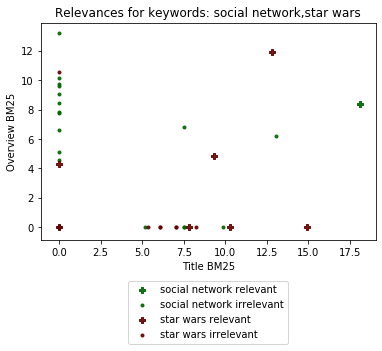

In [46]:
plot_qids(qids=[11,40], focus=[11,40], predictors=predictors,
          features=features)

## Figure 6 Source Plot

Emphasizing Star Wars in the Plot

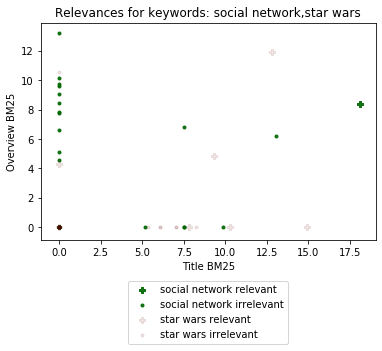

In [48]:
plot_qids(qids=[11,40], focus=[11], predictors=predictors,
          features=features)

## Figure 7 Source Plot

Emphasizing Star Wars in the Plot

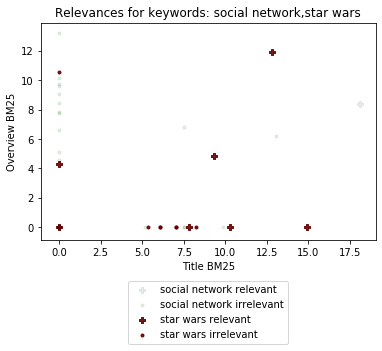

In [49]:
plot_qids(qids=[11,40], focus=[40], predictors=predictors,
          features=features)

0.022934798341751748 0.007834733343876063 0.03045491196200968


/Users/doug/ws/hello-ltr/venv/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



array([[  1,   1],
       [  1,   1],
       [  1,   1],
       ...,
       [  0, 105],
       [  0, 105],
       [  0, 105]])

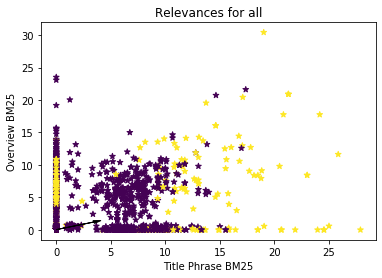

In [33]:
plot_all(predictors=predictors)
predictors

In [34]:
import numpy as np
from ltr.judgments import judgments_from_file, judgments_to_nparray

def pairwise_transform(features, predictors):
    """ Informed by
        https://gist.github.com/agramfort/2071994


        """
    GRADE = 0
    QID = 1

    
    assert features.shape[0] == predictors.shape[0]
    assert predictors.shape[1] == 2
    assert features.shape[1] > 0
    
    num_samples = features.shape[0]
    
    transformed_predictors = []
    transformed_features = []
    
    for i in range(num_samples):
        for j in range(num_samples):
            if (predictors[i][GRADE] != predictors[j][GRADE] and \
                predictors[i][QID] == predictors[j][QID]):
                                
                transformed_predictors.append([predictors[i][GRADE] - predictors[j][GRADE]])
                transformed_features.append(features[i, :] - features[j, :])
    return np.array(transformed_features), np.array(transformed_predictors)

def samples_from_training_data(training_set, scale=False):
    features, predictors = judgments_to_nparray(training_set)
    
    # Scale data
    print("Scaling")
    from sklearn.preprocessing import StandardScaler
    scaler = None
    if scale:
        scaler = StandardScaler()
        scaler.fit(features)
        features = scaler.transform(features)
        
    print("Pairwise Transform")
    features, predictors = pairwise_transform(features, predictors)
    return features, predictors.ravel(), scaler


Scaling
Pairwise Transform


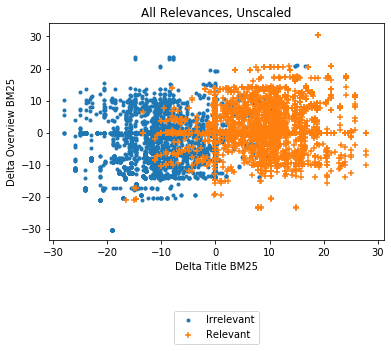

In [35]:
def plot_ungrouped(features, predictors, title):
    from ltr.helpers.movies import get_movie
   
    legend_paths=[]
    for pred in [-1,1]:
        if pred == -1:
            marker = '.'
        elif pred == 1:
            marker = '+'
        path = pl.scatter(features[predictors==pred, 0], 
                          features[predictors==pred, 1], 
                           marker=marker)
        legend_paths.append(path)
        
    
    pl.title(title)
    pl.xlabel(xlabel="Delta Title BM25")
    pl.ylabel(ylabel="Delta Overview BM25")
    pl.legend(legend_paths, ["Irrelevant", "Relevant"], loc='lower center',
              bbox_to_anchor=[0.5,-0.5])
    pl.savefig('fig.png', dpi=300)

features, predictors, scaler = samples_from_training_data(ftr_logger.logged)
plot_ungrouped(features, predictors,title="All Relevances, Unscaled")

Scaling
Pairwise Transform


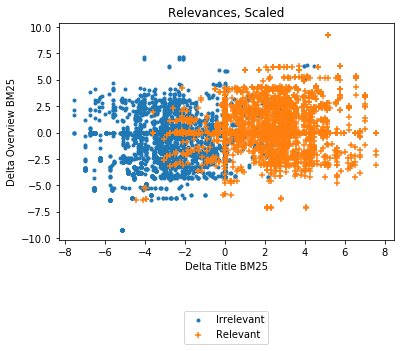

In [36]:
features, predictors, scaler = samples_from_training_data(ftr_logger.logged, scale=True)
features
plot_ungrouped(features, predictors,title="Relevances, Scaled")

Scaling
Pairwise Transform


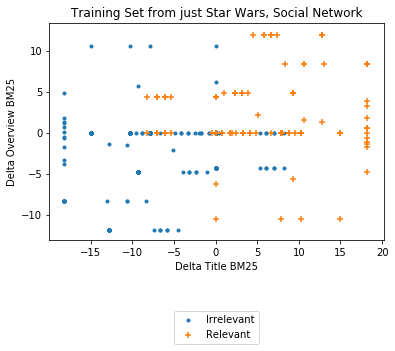

In [37]:
just_star_wars_social_network = []
for j in ftr_logger.logged:
    if j.qid == 11 or j.qid == 40:
        just_star_wars_social_network.append(j)

features, predictors, scaler = samples_from_training_data(just_star_wars_social_network, scale=False)
features
plot_ungrouped(features, predictors,title="Training Set from just Star Wars, Social Network")